<h1>Minerando o banco do PACS</h1>
<p>Aqui, iremos descobrir quantas <strong>séries</strong> foram criadas em cada mês de cada ano.</p>

In [89]:
%matplotlib inline
import psycopg2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

conn = psycopg2.connect("host=pacs.lais.huol.ufrn.br dbname=pacsdb user=******* password=***********")
cur = conn.cursor()

In [41]:
meses = range(1,13)
anos = range(2013,2017)
modalidades = ( "RTSTRUCT", "US", "CR", "MR", "CT",
                "XA", "SC", "PR", "OT", "PDF", "PT",
                "XC", "SR", "KO", "ECG", "DX")

estudo = {}

Abaixo, pegamos a quantidade de séries criadas em cada mês em cada ano no intervalo de 2013 a 2016.
<br/>Diretamente do banco do pacs.

In [63]:
for ano in anos:
    if ano not in estudo:
        estudo[ano] = {}
        dados_ano = estudo[ano] # modificar a variável dados_ano modifica diretamente também em estudos[ano]

    for mes in meses:
        quantidades_mes = []
        for modalidade in modalidades:
            sql = """
            SELECT COUNT(*) from series
            WHERE extract(year from created_time) = %d AND extract(month from created_time) = %d
            AND modality LIKE '%s'
            """ % (ano, mes, "%"+modalidade+"%")
            cur.execute(sql)
            quantidades_mes.append(cur.fetchall()[0][0])
        dados_ano[mes] = pd.Series(quantidades_mes, index=modalidades)

<h1>Resultados</h1>

As colunas são meses e as linhas são modalidades!
<h2>2016<h2>

In [129]:
ano2016 = pd.DataFrame(estudo[2016])
totais2016 = [0] * len(modalidades)
totais2016_mensais = [0] * 12
for mes in ano2016:
    for i in range(len(modalidades)):
        totais2016[i] += ano2016[mes][i]
        totais2016_mensais[mes - 1] += ano2016[mes][i]

totais2016_mensais.append(reduce(lambda x,y: x+y, totais2016_mensais))

ano2016['total do ano'] = totais2016

totais_colunas = pd.Series(totais2016_mensais, index=ano2016.columns)
totais_colunas.name = "total do mes"  

ano2016 = ano2016.append(totais_colunas)

ano2016

,1,2,3,4,5,6,7,8,9,10,11,12,total do ano
RTSTRUCT,0,0,0,0,0,0,0,0,0,0,0,0,0
US,936,991,1214,905,881,1302,917,1353,721,740,864,599,11423
CR,611,709,958,2521,2511,1224,1930,3517,2123,1030,2328,2088,21550
MR,1445,1747,1231,1165,1899,1758,1725,2280,2214,1316,1404,1891,20075
CT,2474,2749,2191,2962,3139,3686,2669,2864,3216,2677,2225,2346,33198
XA,1561,1356,1592,1323,1004,1870,1713,2153,39,1350,1503,849,16313
SC,0,0,0,0,0,1,0,0,7,0,0,7,15
PR,0,0,5,0,1,0,10,13,0,0,0,2,31
OT,0,0,0,0,0,0,0,0,0,843,743,263,1849
PDF,0,0,0,0,0,0,0,0,0,0,0,0,0


<h2>2015<h2>

In [130]:
ano2015 = pd.DataFrame(estudo[2015])
totais2015 = [0] * len(modalidades)
totais2015_mensais = [0] * 12
for mes in ano2015:
    for i in range(len(modalidades)):
        totais2015[i] += ano2015[mes][i]
        totais2015_mensais[mes - 1] += ano2015[mes][i]

totais2015_mensais.append(reduce(lambda x,y: x+y, totais2015_mensais))

ano2015['total do ano'] = totais2015

totais_colunas = pd.Series(totais2015_mensais, index=ano2015.columns)
totais_colunas.name = "total do mes"  

ano2015 = ano2015.append(totais_colunas)

ano2015

,1,2,3,4,5,6,7,8,9,10,11,12,total do ano
RTSTRUCT,0,1,0,0,0,0,0,0,0,0,0,0,1
US,951,978,1051,1357,1278,825,1404,1367,1467,1169,1068,871,13786
CR,0,0,0,0,0,0,294,1046,1600,2871,2292,1245,9348
MR,1597,1630,861,19,9,1560,6795,1871,1607,1758,920,802,19429
CT,1871,3390,2774,1834,1286,967,2794,3303,2324,2578,3045,1608,27774
XA,1282,1270,1407,396,1159,1227,2104,2215,2222,1951,1742,1736,18711
SC,0,1,0,0,6,0,0,0,0,0,0,0,7
PR,1,0,0,0,0,0,3,0,0,0,0,0,4
OT,0,0,0,0,0,0,0,0,0,0,0,0,0
PDF,0,0,0,0,2,0,0,0,0,0,0,0,2


<h2>2014<h2>

In [131]:
ano2014 = pd.DataFrame(estudo[2014])
totais2014 = [0] * len(modalidades)
totais2014_mensais = [0] * 12
for mes in ano2014:
    for i in range(len(modalidades)):
        totais2014[i] += ano2014[mes][i]
        totais2014_mensais[mes - 1] += ano2014[mes][i]

totais2014_mensais.append(reduce(lambda x,y: x+y, totais2014_mensais))

ano2014['total do ano'] = totais2014

totais_colunas = pd.Series(totais2014_mensais, index=ano2014.columns)
totais_colunas.name = "total do mes"  

ano2014 = ano2014.append(totais_colunas)

ano2014

,1,2,3,4,5,6,7,8,9,10,11,12,total do ano
RTSTRUCT,0,0,0,0,0,0,0,0,0,0,0,0,0
US,310,510,401,517,921,593,739,1032,786,842,811,1159,8621
CR,0,0,0,0,0,0,0,0,0,0,0,0,0
MR,472,574,949,484,566,800,598,663,1209,1054,1181,1388,9938
CT,1864,2066,1440,2318,2139,1486,2126,2472,2236,2598,2717,2091,25553
XA,709,1090,897,979,1001,776,941,1363,1105,918,1528,1213,12520
SC,0,0,0,0,0,0,0,0,0,0,0,0,0
PR,0,0,0,0,0,4,0,0,0,0,0,0,4
OT,0,0,0,0,0,0,0,0,0,0,0,0,0
PDF,0,0,0,0,0,0,0,0,0,0,0,0,0


<h2>2013<h2>

In [132]:
ano2013 = pd.DataFrame(estudo[2013])
totais2013 = [0] * len(modalidades)
totais2013_mensais = [0] * 12
for mes in ano2013:
    for i in range(len(modalidades)):
        totais2013[i] += ano2013[mes][i]
        totais2013_mensais[mes - 1] += ano2013[mes][i]

totais2013_mensais.append(reduce(lambda x,y: x+y, totais2013_mensais))

ano2013['total do ano'] = totais2013

totais_colunas = pd.Series(totais2013_mensais, index=ano2013.columns)
totais_colunas.name = "total do mes"  

ano2013 = ano2013.append(totais_colunas)

ano2013

,1,2,3,4,5,6,7,8,9,10,11,12,total do ano
RTSTRUCT,0,0,0,0,0,0,0,0,0,0,0,0,0
US,0,0,0,0,0,0,0,37,415,432,447,272,1603
CR,0,0,0,0,0,0,0,0,0,0,0,0,0
MR,0,0,0,0,0,0,0,0,0,284,596,403,1283
CT,0,0,0,0,0,0,0,1304,1498,2305,2304,1474,8885
XA,0,0,0,0,0,0,0,500,968,604,1015,911,3998
SC,0,0,0,0,0,0,0,0,0,0,0,0,0
PR,0,0,0,0,0,0,0,0,0,0,0,0,0
OT,0,0,0,0,0,0,0,0,0,0,0,0,0
PDF,0,0,0,0,0,0,0,0,0,0,0,0,0


<h1>Vamos plotar!</h1>

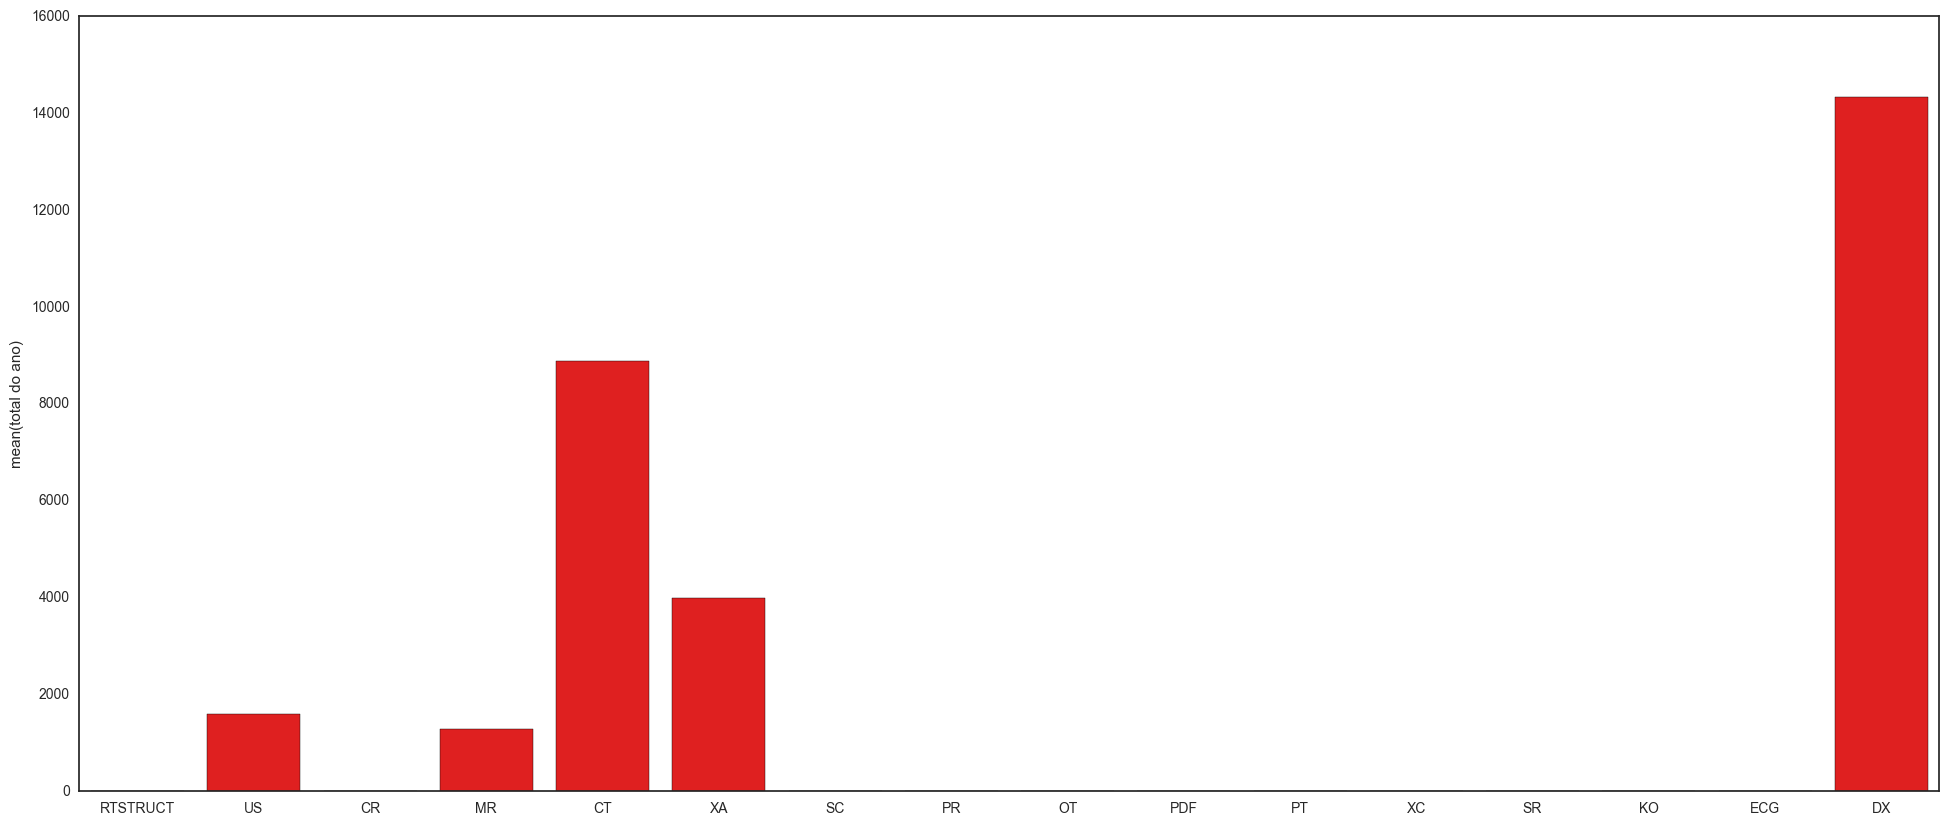

In [93]:
#Configurar propriedades gerais do grafico
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = ano2013.index, y = ano2013['total do ano'], color = "red")